<a href="https://colab.research.google.com/github/MehemmedTagizade/Thesis_Automated-Investigation-of-Cyber-Attacks-Through-Network-Traffic-Analysis-PCAPs-/blob/TEST-CODES/FWA_DDos_SVM_new_all.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np

In [2]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load the dataset
file_path = '/content/drive/MyDrive/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv'
data = pd.read_csv(file_path)


In [23]:
print(data.columns)  # See the actual column names


Index(['DestinationPort', 'FlowDuration', 'TotalFwdPackets',
       'TotalBackwardPackets', 'TotalLengthofFwdPackets',
       'TotalLengthofBwdPackets', 'FwdPacketLengthMax', 'FwdPacketLengthMin',
       'FwdPacketLengthMean', 'FwdPacketLengthStd', 'BwdPacketLengthMax',
       'BwdPacketLengthMin', 'BwdPacketLengthMean', 'BwdPacketLengthStd',
       'FlowBytes/s', 'FlowPackets/s', 'FlowIATMean', 'FlowIATStd',
       'FlowIATMax', 'FlowIATMin', 'FwdIATTotal', 'FwdIATMean', 'FwdIATStd',
       'FwdIATMax', 'FwdIATMin', 'BwdIATTotal', 'BwdIATMean', 'BwdIATStd',
       'BwdIATMax', 'BwdIATMin', 'FwdHeaderLength', 'BwdHeaderLength',
       'FwdPackets/s', 'BwdPackets/s', 'MinPacketLength', 'MaxPacketLength',
       'PacketLengthMean', 'PacketLengthStd', 'PacketLengthVariance',
       'FINFlagCount', 'SYNFlagCount', 'RSTFlagCount', 'PSHFlagCount',
       'ACKFlagCount', 'URGFlagCount', 'Down/UpRatio', 'AveragePacketSize',
       'AvgFwdSegmentSize', 'AvgBwdSegmentSize', 'act_data_pkt_fwd',
 

In [24]:
data.rename(columns=lambda x: x.strip(), inplace=True)


In [25]:
print(data.columns)


Index(['DestinationPort', 'FlowDuration', 'TotalFwdPackets',
       'TotalBackwardPackets', 'TotalLengthofFwdPackets',
       'TotalLengthofBwdPackets', 'FwdPacketLengthMax', 'FwdPacketLengthMin',
       'FwdPacketLengthMean', 'FwdPacketLengthStd', 'BwdPacketLengthMax',
       'BwdPacketLengthMin', 'BwdPacketLengthMean', 'BwdPacketLengthStd',
       'FlowBytes/s', 'FlowPackets/s', 'FlowIATMean', 'FlowIATStd',
       'FlowIATMax', 'FlowIATMin', 'FwdIATTotal', 'FwdIATMean', 'FwdIATStd',
       'FwdIATMax', 'FwdIATMin', 'BwdIATTotal', 'BwdIATMean', 'BwdIATStd',
       'BwdIATMax', 'BwdIATMin', 'FwdHeaderLength', 'BwdHeaderLength',
       'FwdPackets/s', 'BwdPackets/s', 'MinPacketLength', 'MaxPacketLength',
       'PacketLengthMean', 'PacketLengthStd', 'PacketLengthVariance',
       'FINFlagCount', 'SYNFlagCount', 'RSTFlagCount', 'PSHFlagCount',
       'ACKFlagCount', 'URGFlagCount', 'Down/UpRatio', 'AveragePacketSize',
       'AvgFwdSegmentSize', 'AvgBwdSegmentSize', 'act_data_pkt_fwd',
 

In [26]:
import pandas as pd

# Load your dataset (replace 'your_dataset.csv' with the actual filename)


# Check if "Label" column exists
if "Label" in data.columns:
    unique_labels = data["Label"].unique()
    print(f"Unique values in 'Label' column: {unique_labels}")
    print(f"Number of unique values: {len(unique_labels)}")
else:
    print("No 'Label' column found in this dataset.")
# Count occurrences of each label
label_counts = data["Label"].value_counts()

# Convert to percentages
label_percentages = (label_counts / label_counts.sum()) * 100

# Display the results
print(label_percentages)



Unique values in 'Label' column: ['BENIGN' 'DDoS']
Number of unique values: 2
Label
DDoS      56.720762
BENIGN    43.279238
Name: count, dtype: float64


In [27]:

# Clean column names by removing extra spaces
data.columns = data.columns.str.replace(' ', '')
print(data.columns)

Index(['DestinationPort', 'FlowDuration', 'TotalFwdPackets',
       'TotalBackwardPackets', 'TotalLengthofFwdPackets',
       'TotalLengthofBwdPackets', 'FwdPacketLengthMax', 'FwdPacketLengthMin',
       'FwdPacketLengthMean', 'FwdPacketLengthStd', 'BwdPacketLengthMax',
       'BwdPacketLengthMin', 'BwdPacketLengthMean', 'BwdPacketLengthStd',
       'FlowBytes/s', 'FlowPackets/s', 'FlowIATMean', 'FlowIATStd',
       'FlowIATMax', 'FlowIATMin', 'FwdIATTotal', 'FwdIATMean', 'FwdIATStd',
       'FwdIATMax', 'FwdIATMin', 'BwdIATTotal', 'BwdIATMean', 'BwdIATStd',
       'BwdIATMax', 'BwdIATMin', 'FwdHeaderLength', 'BwdHeaderLength',
       'FwdPackets/s', 'BwdPackets/s', 'MinPacketLength', 'MaxPacketLength',
       'PacketLengthMean', 'PacketLengthStd', 'PacketLengthVariance',
       'FINFlagCount', 'SYNFlagCount', 'RSTFlagCount', 'PSHFlagCount',
       'ACKFlagCount', 'URGFlagCount', 'Down/UpRatio', 'AveragePacketSize',
       'AvgFwdSegmentSize', 'AvgBwdSegmentSize', 'act_data_pkt_fwd',
 

In [28]:
data.replace([np.inf, -np.inf], np.nan, inplace=True)
data.dropna(inplace=True)

# Display the first 10 rows of the dataset
print("First 10 rows of the dataset:")
print(data.head(10))



First 10 rows of the dataset:
   DestinationPort  FlowDuration  TotalFwdPackets  TotalBackwardPackets  \
0              443       5322475                6                     4   
1               80        461503                3                     6   
2               80       5084468                2                     2   
3              443     116713028               31                    32   
4              443     116715847               27                    28   
5               80       2260080                5                     0   
6               80       1988950                5                     0   
7               80      78857485                8                     4   
8               80        523690                3                     5   
9            19102       6615555                1                     5   

   TotalLengthofFwdPackets  TotalLengthofBwdPackets  FwdPacketLengthMax  \
0                      611                      168                 5

In [29]:
print(data.isnull().sum())


DestinationPort            0
FlowDuration               0
TotalFwdPackets            0
TotalBackwardPackets       0
TotalLengthofFwdPackets    0
TotalLengthofBwdPackets    0
FwdPacketLengthMax         0
FwdPacketLengthMin         0
FwdPacketLengthMean        0
FwdPacketLengthStd         0
BwdPacketLengthMax         0
BwdPacketLengthMin         0
BwdPacketLengthMean        0
BwdPacketLengthStd         0
FlowBytes/s                0
FlowPackets/s              0
FlowIATMean                0
FlowIATStd                 0
FlowIATMax                 0
FlowIATMin                 0
FwdIATTotal                0
FwdIATMean                 0
FwdIATStd                  0
FwdIATMax                  0
FwdIATMin                  0
BwdIATTotal                0
BwdIATMean                 0
BwdIATStd                  0
BwdIATMax                  0
BwdIATMin                  0
FwdHeaderLength            0
BwdHeaderLength            0
FwdPackets/s               0
BwdPackets/s               0
MinPacketLengt

In [30]:
print(data['Label'].value_counts())


Label
DDoS      128025
BENIGN     97686
Name: count, dtype: int64


In [31]:
irrelevant_columns = [
    'FwdPSHFlags', 'BwdPSHFlags', 'FwdURGFlags', 'BwdURGFlags',
    'CWEFlagCount', 'ECEFlagCount', 'FwdHeaderLength.1',
    'FwdAvgBytes/Bulk', 'FwdAvgPackets/Bulk', 'FwdAvgBulkRate',
    'BwdAvgBytes/Bulk', 'BwdAvgPackets/Bulk', 'BwdAvgBulkRate',
    'Init_Win_bytes_forward', 'Init_Win_bytes_backward',
    'SubflowFwdPackets', 'SubflowFwdBytes', 'SubflowBwdPackets', 'SubflowBwdBytes',
    'ActiveMean', 'ActiveStd', 'ActiveMax', 'ActiveMin',
    'IdleMean', 'IdleStd', 'IdleMax', 'IdleMin'
]

data = data.drop(columns=irrelevant_columns, errors='ignore')
print(data.columns)
print(len(data.columns))

Index(['DestinationPort', 'FlowDuration', 'TotalFwdPackets',
       'TotalBackwardPackets', 'TotalLengthofFwdPackets',
       'TotalLengthofBwdPackets', 'FwdPacketLengthMax', 'FwdPacketLengthMin',
       'FwdPacketLengthMean', 'FwdPacketLengthStd', 'BwdPacketLengthMax',
       'BwdPacketLengthMin', 'BwdPacketLengthMean', 'BwdPacketLengthStd',
       'FlowBytes/s', 'FlowPackets/s', 'FlowIATMean', 'FlowIATStd',
       'FlowIATMax', 'FlowIATMin', 'FwdIATTotal', 'FwdIATMean', 'FwdIATStd',
       'FwdIATMax', 'FwdIATMin', 'BwdIATTotal', 'BwdIATMean', 'BwdIATStd',
       'BwdIATMax', 'BwdIATMin', 'FwdHeaderLength', 'BwdHeaderLength',
       'FwdPackets/s', 'BwdPackets/s', 'MinPacketLength', 'MaxPacketLength',
       'PacketLengthMean', 'PacketLengthStd', 'PacketLengthVariance',
       'FINFlagCount', 'SYNFlagCount', 'RSTFlagCount', 'PSHFlagCount',
       'ACKFlagCount', 'URGFlagCount', 'Down/UpRatio', 'AveragePacketSize',
       'AvgFwdSegmentSize', 'AvgBwdSegmentSize', 'act_data_pkt_fwd',
 

In [32]:
begnin_count = data[data['Label'] == 'BENIGN'].shape[0]
print(f"Number of BENIGN samples: {begnin_count}")

ddos_count = data[data['Label'] == 'DDoS'].shape[0]
print(f"Number of DDoS samples: {ddos_count}")

Number of BENIGN samples: 97686
Number of DDoS samples: 128025


In [33]:
from math import floor
import pandas as pd

benign_samples = data[data['Label'] == 'BENIGN']
malicious_samples = data[data['Label'] == 'DDoS']  # Take all DDoS samples

# Combine all benign and DDoS samples
data = pd.concat([benign_samples, malicious_samples])

# Shuffle the data
data = data.sample(frac=1, random_state=42).reset_index(drop=True)


In [34]:
print(data['Label'].value_counts())


Label
DDoS      128025
BENIGN     97686
Name: count, dtype: int64


In [35]:
# Calculate the correlation matrix, ignoring non-numerical columns
correlation_matrix = data.select_dtypes(include=[np.number]).corr()

# Find highly correlated features (e.g., with correlation > 0.9)
high_corr = correlation_matrix[correlation_matrix > 0.9]
print(high_corr)


                         DestinationPort  FlowDuration  TotalFwdPackets  \
DestinationPort                      1.0           NaN              NaN   
FlowDuration                         NaN      1.000000              NaN   
TotalFwdPackets                      NaN           NaN         1.000000   
TotalBackwardPackets                 NaN           NaN         0.956714   
TotalLengthofFwdPackets              NaN           NaN              NaN   
TotalLengthofBwdPackets              NaN           NaN         0.938470   
FwdPacketLengthMax                   NaN           NaN              NaN   
FwdPacketLengthMin                   NaN           NaN              NaN   
FwdPacketLengthMean                  NaN           NaN              NaN   
FwdPacketLengthStd                   NaN           NaN              NaN   
BwdPacketLengthMax                   NaN           NaN              NaN   
BwdPacketLengthMin                   NaN           NaN              NaN   
BwdPacketLengthMean      

In [36]:
from sklearn.model_selection import train_test_split
X = data.drop('Label', axis=1)
y = data['Label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training set size: {len(X_train)}, Test set size: {len(X_test)}")



Training set size: 180568, Test set size: 45143


In [37]:
# Separate features and labels
features = data.drop('Label', axis=1)
labels = data['Label']
features.replace([np.inf, -np.inf], np.nan, inplace=True)
features.dropna(inplace=True)
features = features.select_dtypes(include=[float, int])
len(features)

225711

In [38]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

In [39]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(labels)

In [40]:
round(data.shape[0]*80/100)

180569

In [41]:
missing_labels = np.isnan(y_encoded).sum()
print(f"Number of missing values in y_encoded: {missing_labels}")

Number of missing values in y_encoded: 0


In [42]:
train_size = round(len(y_encoded) * 0.9)

X_train = features_scaled[:train_size]
X_test = features_scaled[train_size:]
y_train = y_encoded[:train_size]
y_test = y_encoded[train_size:]

print(f"Length of X_train: {len(X_train)}")
print(f"Length of y_train: {len(y_train)}")
print(f"Length of X_test: {len(X_test)}")
print(f"Length of y_test: {len(y_test)}")

min_len = min(len(X_test), len(y_test))
X_test = X_test[:min_len]
y_test = y_test[:min_len]

print(f"Final Length of X_test: {len(X_test)}")
print(f"Final Length of y_test: {len(y_test)}")

Length of X_train: 203140
Length of y_train: 203140
Length of X_test: 22571
Length of y_test: 22571
Final Length of X_test: 22571
Final Length of y_test: 22571


Accuracy: 0.9981835098134775
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      9795
           1       1.00      1.00      1.00     12776

    accuracy                           1.00     22571
   macro avg       1.00      1.00      1.00     22571
weighted avg       1.00      1.00      1.00     22571

Number of detected anomalies (DDoS cases): 12779


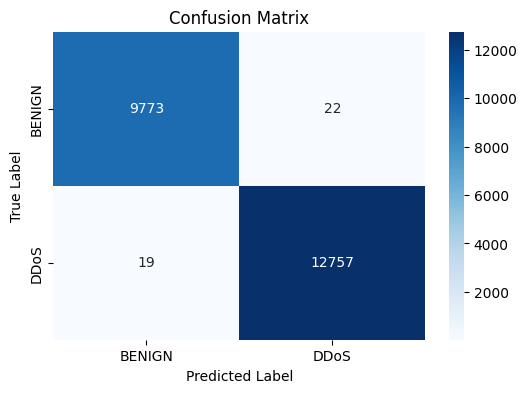

In [47]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


import numpy as np

# Initialize SVM Classifier (using RBF kernel for non-linearity)
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)

# Train the model
svm_model.fit(X_train, y_train)

# Make predictions
y_pred = svm_model.predict(X_test)

anomalies_detected = np.sum(y_pred ==1)  # Count predicted DDoS cases
# Evaluate model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print(f"Number of detected anomalies (DDoS cases): {anomalies_detected}")
# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues',
            xticklabels=["BENIGN", "DDoS"], yticklabels=["BENIGN", "DDoS"])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
